### Data Visualization
##### Author: Kennette James Basco

In [243]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv 

inputFileName = "New_York_City_Leading_Causes_of_Death.csv"

##### Visualizing Leading Causes of Death

In [242]:
leadingCausesMap = {'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)': 0, 'Diabetes Mellitus (E10-E14)': 0, 'Assault (Homicide: Y87.1, X85-Y09)' : 0, 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)': 0, 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)': 0, 'Septicemia (A40-A41)': 0, 'Chronic Lower Respiratory Diseases (J40-J47)': 0, 'Certain Conditions originating in the Perinatal Period (P00-P96)': 0, 'All Other Causes': 0, 'Viral Hepatitis (B15-B19)': 0, 'Chronic Liver Disease and Cirrhosis (K70, K73)': 0, 'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)': 0, 'Malignant Neoplasms (Cancer: C00-C97)': 0, 'Influenza (Flu) and Pneumonia (J09-J18)': 0, 'Cerebrovascular Disease (Stroke: I60-I69)': 0, 'Essential Hypertension and Renal Diseases (I10, I12)': 0, 'Diseases of Heart (I00-I09, I11, I13, I20-I51)': 0, 'Human Immunodeficiency Virus Disease (HIV: B20-B24)': 0, 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)': 0, "Alzheimer's Disease (G30)": 0}

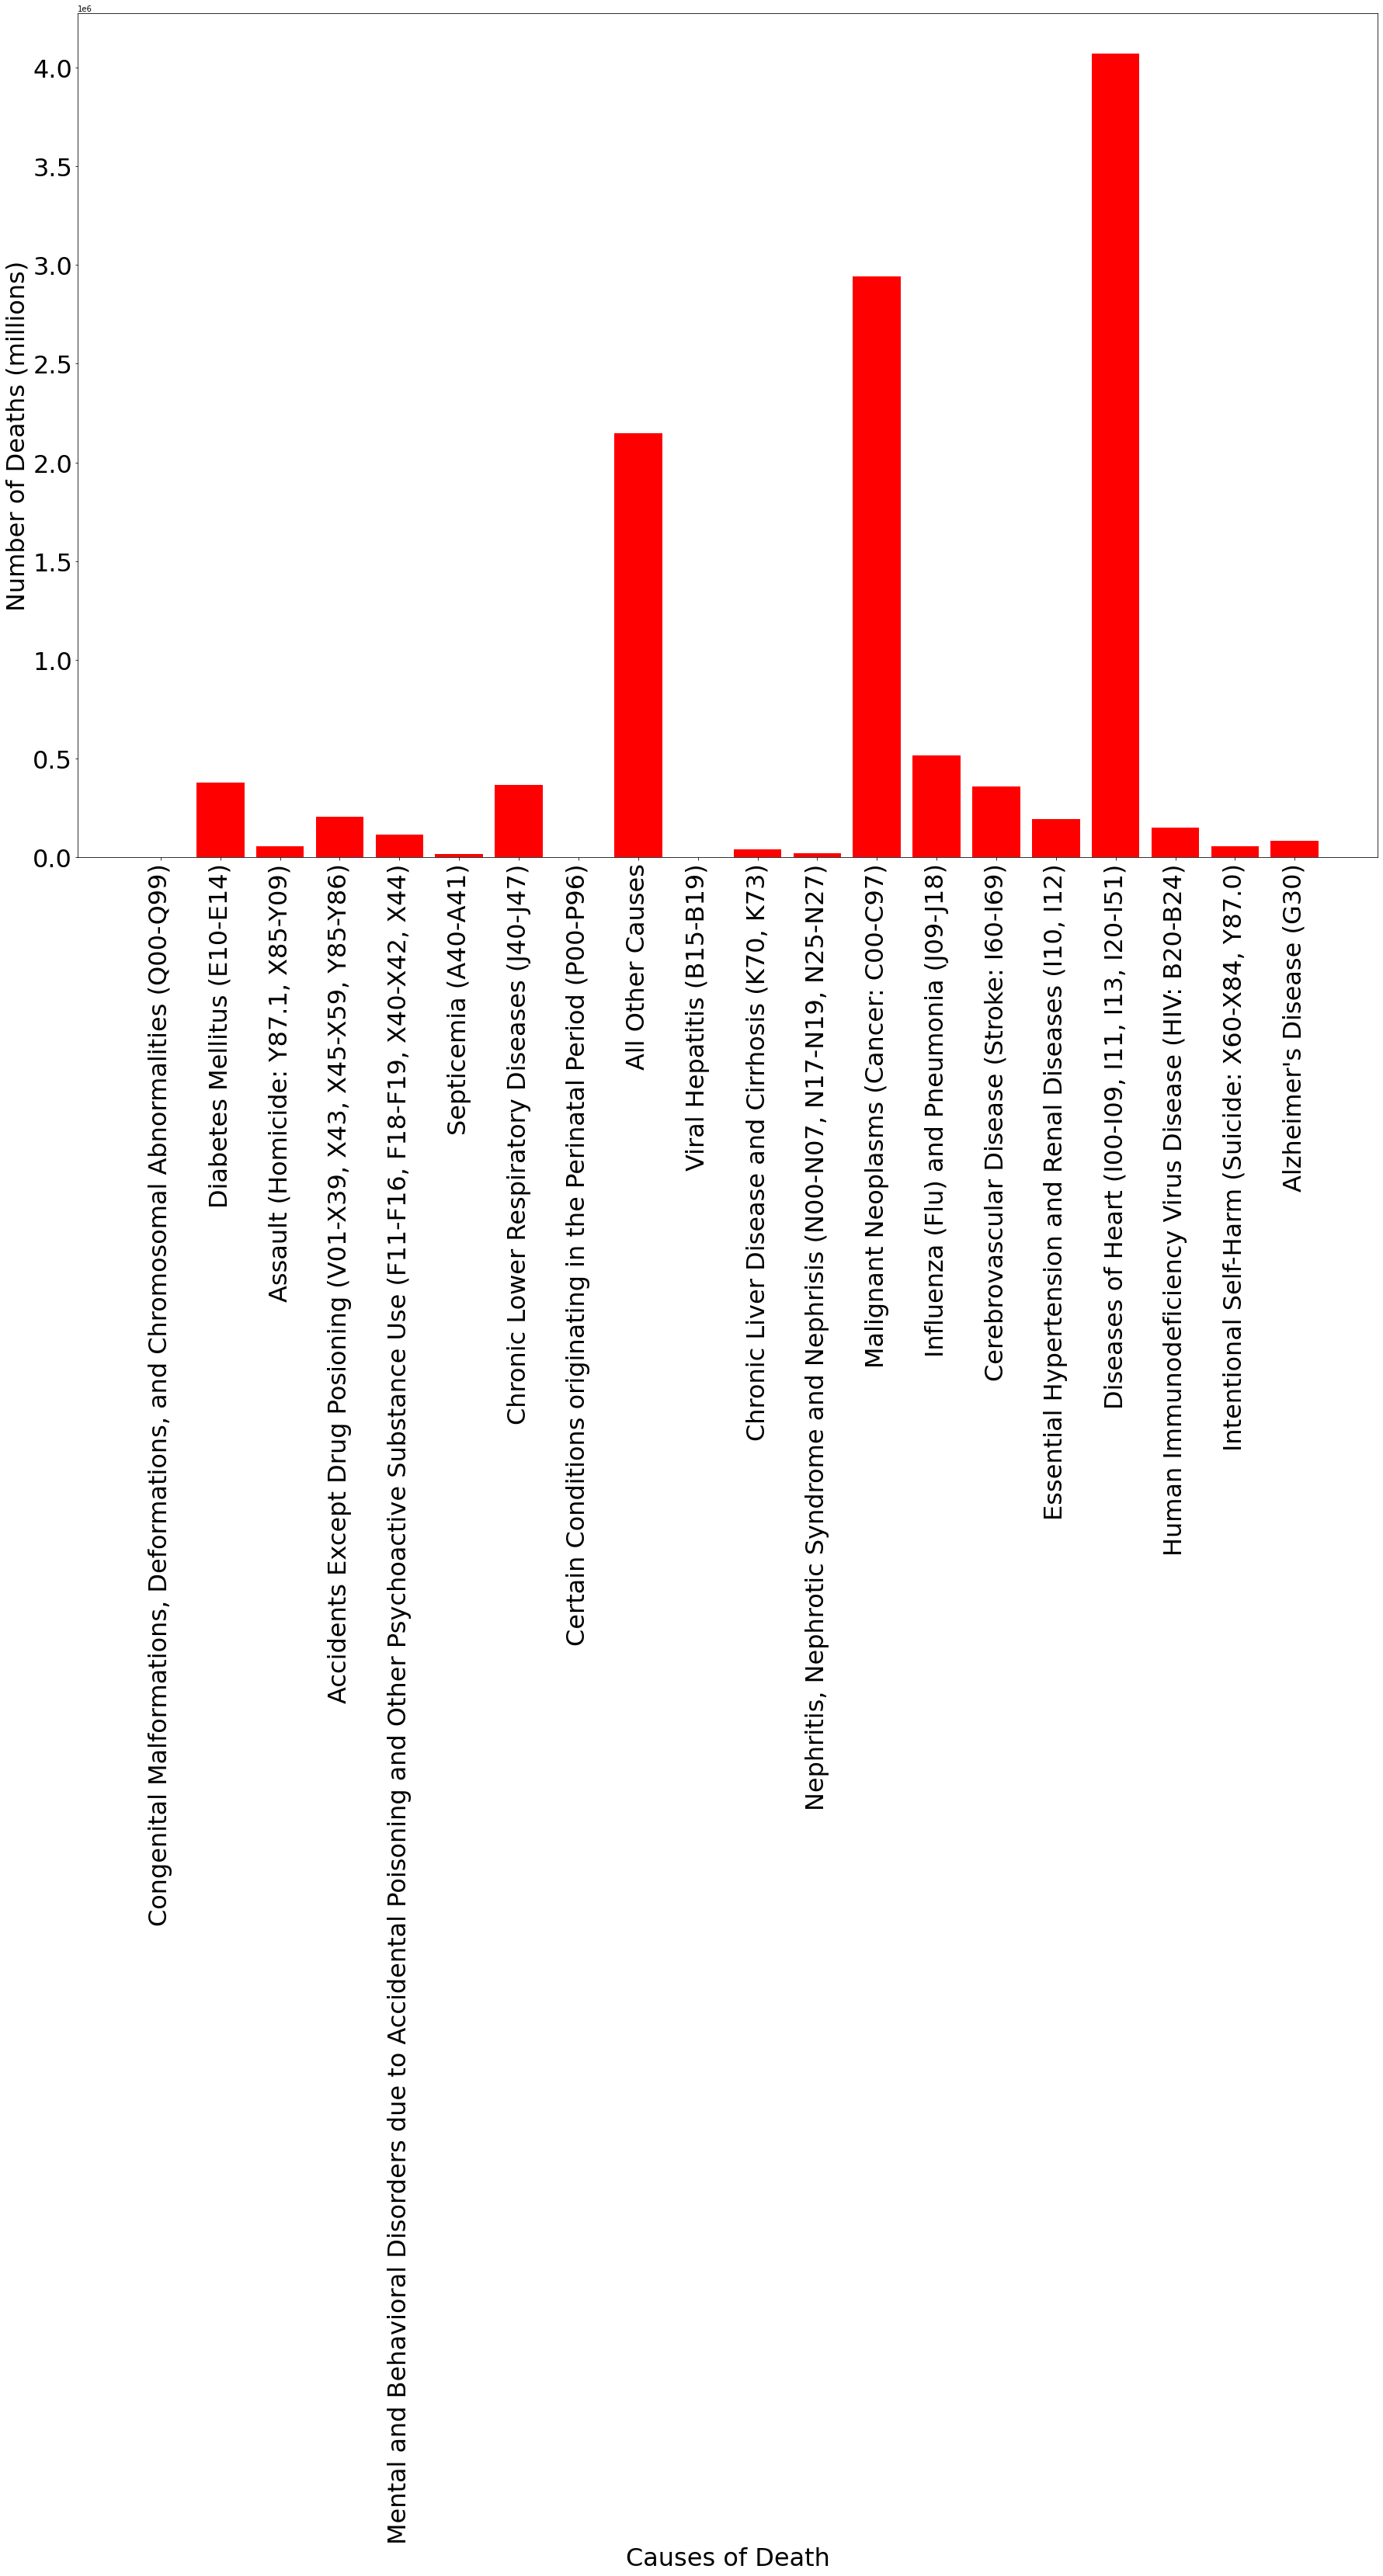

In [241]:
with open(inputFileName, mode = "r") as inputFile:
    collection = (list(csv.reader(inputFile)))
    for i in range(1, len(collection)):
        leadingCausesMap[collection[i][1]] = leadingCausesMap.get(collection[i][1]) + int(collection[i][4])
    
leadingCauses = leadingCausesMap.keys()
leadingCausesCount = leadingCausesMap.values()

fig = plt.figure(figsize = (30, 20))

plt.bar(leadingCauses, leadingCausesCount, color="red")
plt.xticks(rotation='vertical', fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Causes of Death', fontsize=32)
plt.ylabel('Number of Deaths (millions)', fontsize=32)
plt.show()

##### Visualizing Prevalence of Diabetes Mellitus According to Race Ethnicity for Male and Female

In [238]:
diabetesMale = {'Hispanic': 0, 'Asian and Pacific Islander': 0, 'Black Non-Hispanic':0, 'White Non-Hispanic':0}
diabetesFemale =  {'Hispanic': 0, 'Asian and Pacific Islander': 0, 'Black Non-Hispanic':0, 'White Non-Hispanic':0}

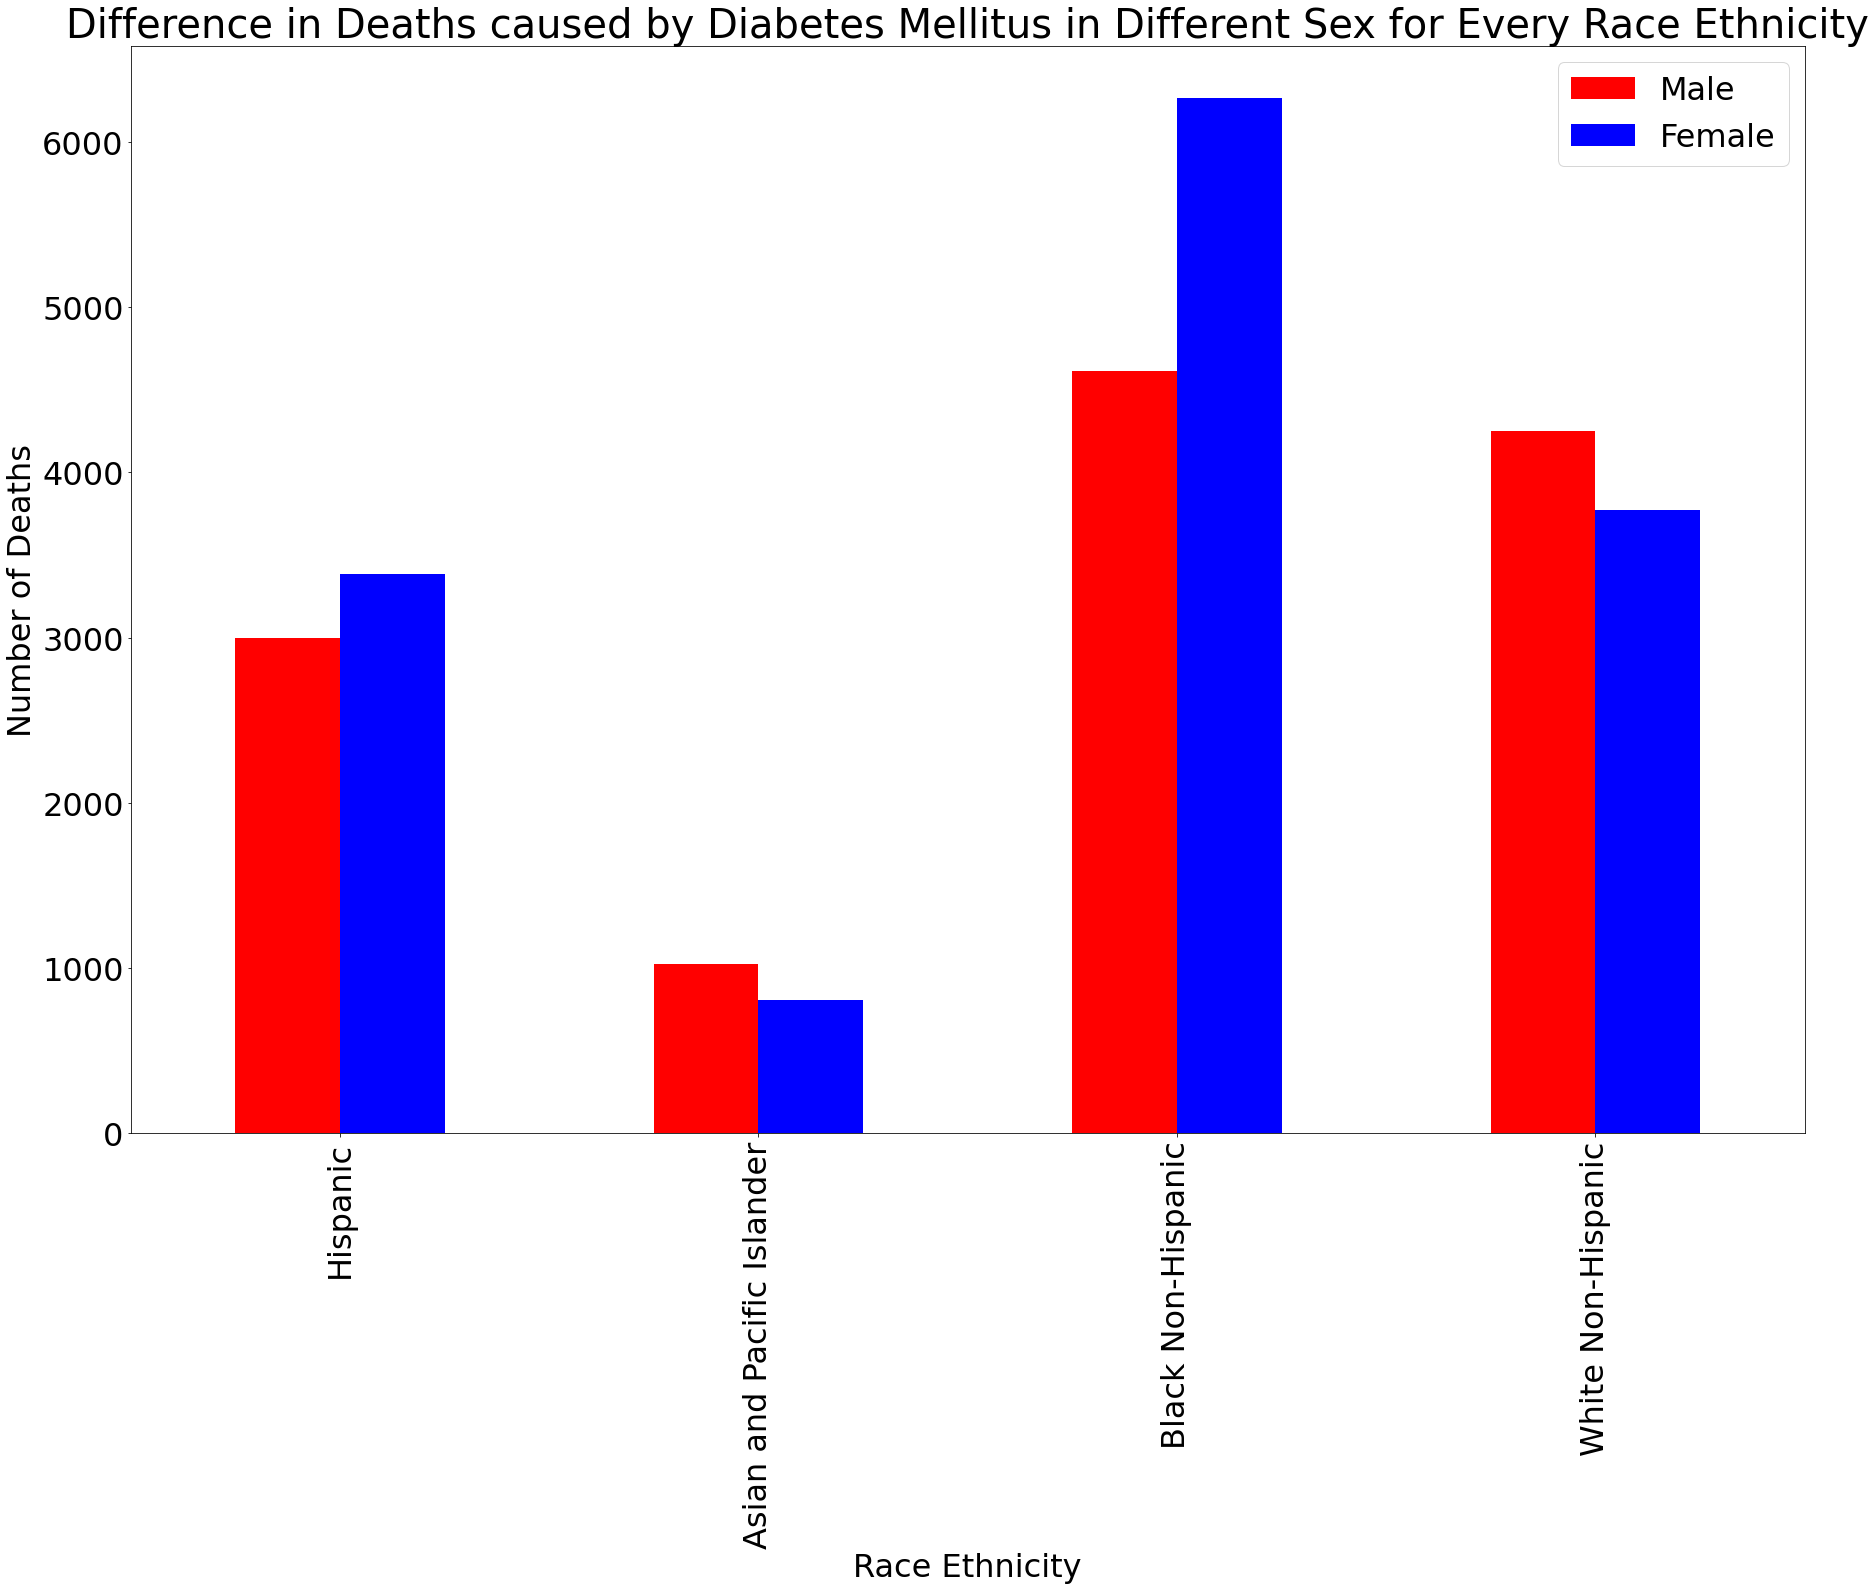

In [240]:
with open(inputFileName, mode = "r") as inputFile:
    collection = (list(csv.reader(inputFile)))
    
    for i in range(1, len(collection)):
        if collection[i][1] == 'Diabetes Mellitus (E10-E14)':
            sex = collection[i][2]
            race = collection[i][3]
            diabetesDeathCount = collection[i][4]
            
            if sex == "M":
                diabetesMale[race] = diabetesMale.get(race) + int(diabetesDeathCount)
            else:
                diabetesFemale[race] = diabetesFemale.get(race) + int(diabetesDeathCount)

labels = ['Hispanic', 'Asian and Pacific Islander', 'Black Non-Hispanic', 'White Non-Hispanic']
maleDeaths = list(diabetesMale.values())
femaleDeaths = list(diabetesFemale.values())

df = pd.DataFrame([['Hispanic', maleDeaths[0], femaleDeaths[0]], ['Asian and Pacific Islander', maleDeaths[1], femaleDeaths[1]], ['Black Non-Hispanic', maleDeaths[2], femaleDeaths[2]],
                   ['White Non-Hispanic', maleDeaths[3], femaleDeaths[3]]],
                  columns=['Sex', 'Male', 'Female'])

ax = df.plot(x='Sex',
        kind='bar',
        color = ['r','b'],
        fontsize=32,
        figsize=(30,20)
       )

ax.set_xlabel("Race Ethnicity", fontsize=32)
ax.set_ylabel('Number of Deaths', fontsize=32)
plt.title('Difference in Deaths caused by Diabetes Mellitus in Different Sex for Every Race Ethnicity',
          fontsize = 40)
plt.legend(prop={'size': 32})